## Objectif
L'objectif de ce sujet d'√©tude est de comprendre et impl√©menter le mod√®le √©pid√©miologique SIRD (Susceptibles, Infect√©s, R√©tabli) avec une composante suppl√©mentaire pour les d√©c√®s. Vous utiliserez la m√©thode d'Euler pour r√©soudre num√©riquement le syst√®me d'√©quations diff√©rentielles qui d√©crit l'√©volution de la maladie dans une population.
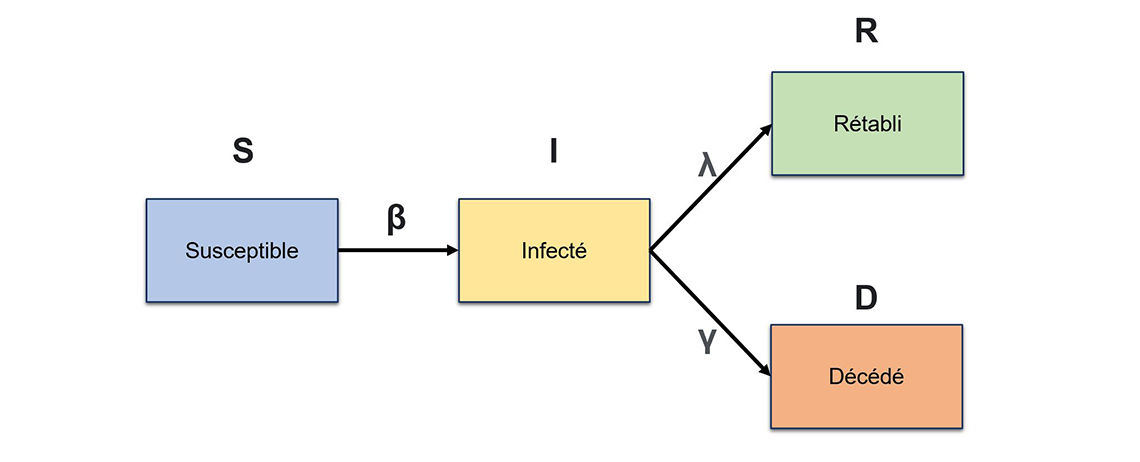


## Contexte
Le mod√®le SIR est un mod√®le math√©matique utilis√© en √©pid√©miologie pour d√©crire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les d√©c√®s (D), ce qui donne le mod√®le SIRD.

Les variables du mod√®le sont les suivantes :
- $S(t)$ : % de la population susceptibles d'√™tre infect√©es √† l'instant $t$
- $I(t)$ : % de la population infect√©es √† l'instant $t$
- $R(t)$ : % de la population r√©tablies (et immunis√©es) √† l'instant $t$
- $D(t)$ : % de la population d√©c√©d√©es √† l'instant $t$

Les param√®tres du mod√®le sont :
- $\beta$ : Taux de transmission de la maladie (probabilit√© de transmission par contact)
- $\gamma$ : Taux de gu√©rison (et d'immunisation)
- $\mu$ : Taux de mortalit√© d√ª √† la maladie

Les √©quations diff√©rentielles qui d√©crivent le mod√®le SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### √âtape 1 : Impl√©mentation de la m√©thode d'Euler
0. Discretiser le syst√®me d'√©quations diff√©rentielles
1. √âcrire une fonction Python qui impl√©mente la m√©thode d'Euler pour ce syst√®me d'√©quations diff√©rentielles. Cette fonction doit prendre en entr√©e :
    - Le param√©trage des √©quations diff√©rentielles
    - Les conditions initiales
    - Le pas de temps
    - La dur√©e de la simulation

**Ici $t$ est en jour, donc si votre pas est √©gale √† 0.01, il vous faut effectuer 100 pas pour simuler toute une journ√©e**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# Fonction de la m√©thode d'Euler pour le mod√®le SIRD
def methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max):
    # Calcul du nombre d'√©tapes
    nombre_etapes = int(t_max / dt)
    
    # Cr√©ation des listes pour stocker les r√©sultats
    S = [0.0] * (nombre_etapes + 1)  # Inclure l'√©tape initiale
    I = [0.0] * (nombre_etapes + 1)
    R = [0.0] * (nombre_etapes + 1)
    D = [0.0] * (nombre_etapes + 1)
    t = [0.0] * (nombre_etapes + 1)
    
    # Initialisation des valeurs initiales
    S[0] = S0
    I[0] = I0
    R[0] = R0
    D[0] = D0
    t[0] = 0.0
    
    # Boucle pour appliquer la m√©thode d'Euler
    for i in range(1, nombre_etapes + 1):
        # Calcul des variations
        dS = -beta * S[i - 1] * I[i - 1] * dt
        dI = (beta * S[i - 1] * I[i - 1] - gamma * I[i - 1] - mu * I[i - 1]) * dt
        dR = gamma * I[i - 1] * dt
        dD = mu * I[i - 1] * dt
        
        # Mise √† jour des valeurs
        S[i] = S[i - 1] + dS
        I[i] = I[i - 1] + dI
        R[i] = R[i - 1] + dR
        D[i] = D[i - 1] + dD
        t[i] = t[i - 1] + dt
    
    # Retourner les r√©sultats
    return t, S, I, R, D





### √âtape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de param√®tres donn√©:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est √©gale √† 0.01, il vous faut effectuer 100 pas pour simuler toute une journ√©e**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [2]:
# Param√®tres de simulation
beta = 0.5  # Taux de transmission
gamma = 0.15  # Taux de gu√©rison
mu = 0.015  # Taux de mortalit√©
S0 = 0.99  # Pourcentage initial de susceptibles
I0 = 0.01  # Pourcentage initial d'infect√©s
R0 = 0.0  # Pourcentage initial de r√©tablis
D0 = 0.0  # Pourcentage initial de d√©c√®s
dt = 0.01  # Pas de temps (en jours)
t_max = 100  # Dur√©e de la simulation (en jours)

# Simulation
temps, susceptibles, infectes, retablis, decedes = methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max)

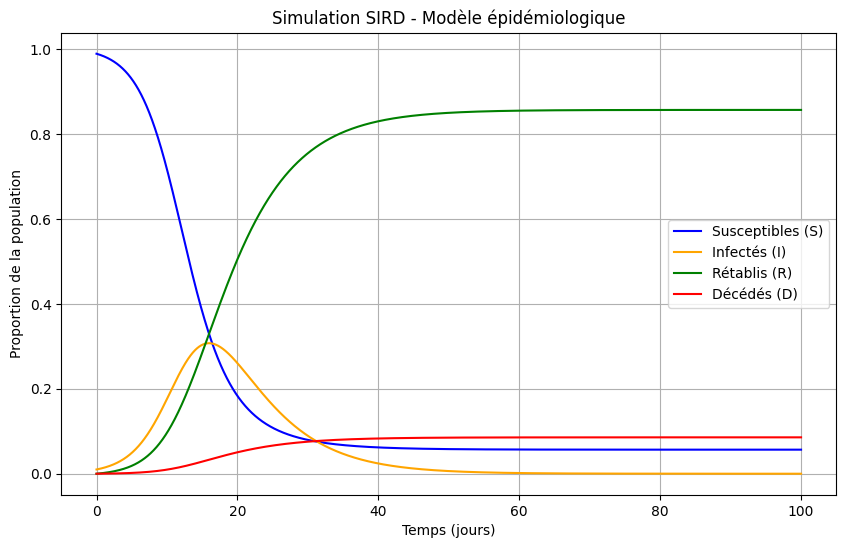

In [3]:
# Trac√© des courbes
plt.figure(figsize=(10, 6))
plt.plot(temps, susceptibles, label="Susceptibles (S)", color="blue")
plt.plot(temps, infectes, label="Infect√©s (I)", color="orange")
plt.plot(temps, retablis, label="R√©tablis (R)", color="green")
plt.plot(temps, decedes, label="D√©c√©d√©s (D)", color="red")
plt.title("Simulation SIRD - Mod√®le √©pid√©miologique")
plt.xlabel("Temps (jours)")
plt.ylabel("Proportion de la population")
plt.legend()
plt.grid()
plt.show()


## Etape 3: Ajustement des param√®tres du mod√®le SIRD avec des donn√©es empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des param√®tres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les donn√©es g√©n√©r√©es de l'√©volution de l'√©pid√©mie, en utilisant un dataset bruit√©.

### Instructions

1. **Lire les donn√©es du fichier `sird_dataset.csv`.**
2. **Impl√©menter une fonction de co√ªt** qui mesure l'√©cart entre les donn√©es observ√©es et les r√©sultats du mod√®le SIRD pour un jeu de param√®tres donn√©.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une m√©thode d'optimisation (Grid Search)** pour minimiser cette fonction de co√ªt et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 √† 0.5
- $\gamma$ varie de 0.08 √† 0.15
- $\mu$ varie de 0.005 √† 0.015

4. Visualisez sur un m√™me graphique les r√©sultats de votre mod√®le th√©orique optimal et les donn√©es empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est √©gale √† 0.01, il vous faut effectuer 100 pas pour simuler toute une journ√©e


In [4]:
# Lecture du fichier CSV
dataset_path = "sird_dataset.csv"
data = pd.read_csv(dataset_path, encoding='utf-8')


In [5]:
"""  Justification du choix de la MSE
La MSE est un bon choix pour mesurer la diff√©rence entre les donn√©es observ√©es et pr√©dites 
parce qu'elle est simple √† calculer et facile √† comprendre. 
Elle punit les grandes erreurs plus s√©v√®rement, ce qui aide √† rendre le mod√®le plus pr√©cis. 
Contrairement √† la Cross-Entropy, qui est utilis√©e pour des probl√®mes de classification """


# Renommer les colonnes pour enlever les accents
data.columns = ['Jour', 'Susceptibles', 'Infectes', 'Retablis', 'Deces']

# Affichage des premi√®res lignes du dataset
print(data.head())

# Fonction de co√ªt (MSE - Mean Squared Error)
def mse_total(observed, predicted):
    mse_s = np.mean((np.array(observed['Susceptibles']) - np.array(predicted[0])) ** 2)
    mse_i = np.mean((np.array(observed['Infectes']) - np.array(predicted[1])) ** 2)
    mse_r = np.mean((np.array(observed['Retablis']) - np.array(predicted[2])) ** 2)
    mse_d = np.mean((np.array(observed['Deces']) - np.array(predicted[3])) ** 2)
    return (mse_s + mse_i + mse_r + mse_d) / 4

# D√©finir les valeurs possibles pour les param√®tres
beta_values = np.linspace(0.25, 0.5, 5)
gamma_values = np.linspace(0.08, 0.15, 5)
mu_values = np.linspace(0.005, 0.015, 5)

best_params = None
best_loss = float("inf")

   Jour  Susceptibles  Infectes  Retablis     Deces
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [6]:
# Utiliser Grid Search pour trouver les meilleurs param√®tres
for beta, gamma, mu in product(beta_values, gamma_values, mu_values):
    t_pred, S_pred, I_pred, R_pred, D_pred = methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max)
    
    # √âchantillonner les donn√©es pr√©dites pour correspondre aux jours entiers
    indices = np.arange(0, len(t_pred), int(1/dt))[:len(data)]
    S_sampled = np.array(S_pred)[indices]
    I_sampled = np.array(I_pred)[indices]
    R_sampled = np.array(R_pred)[indices]
    D_sampled = np.array(D_pred)[indices]
    
    loss = mse_total(data, [S_sampled, I_sampled, R_sampled, D_sampled])
    
    if loss < best_loss:
        best_loss = loss
        best_params = (beta, gamma, mu)

print(f"Meilleurs param√®tres : beta={best_params[0]}, gamma={best_params[1]}, mu={best_params[2]}")


Meilleurs param√®tres : beta=0.3125, gamma=0.11499999999999999, mu=0.009999999999999998


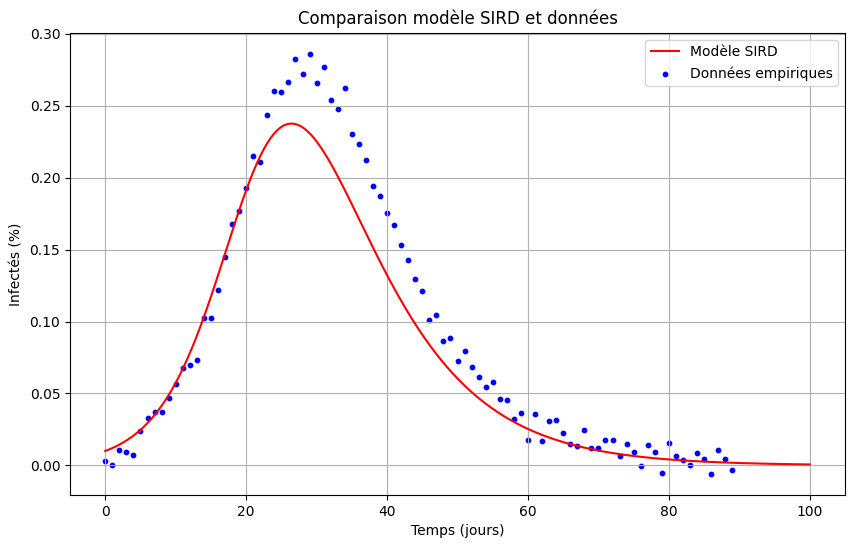

In [7]:
# Simulation avec les meilleurs param√®tres
temps_opt, S_opt, I_opt, R_opt, D_opt = methode_euler_sird(*best_params, S0, I0, R0, D0, dt, t_max)

# Tracer les courbes des donn√©es observ√©es et du mod√®le th√©orique optimal
plt.figure(figsize=(10, 6))
plt.plot(temps_opt, I_opt, label="Mod√®le SIRD", color="red")
plt.scatter(data["Jour"], data["Infectes"], label="Donn√©es empiriques", color="blue", s=10)
plt.xlabel("Temps (jours)")
plt.ylabel("Infect√©s (%)")
plt.title("Comparaison mod√®le SIRD et donn√©es")
plt.legend()
plt.grid()
plt.show()


### √âtape 4 : Sc√©narios de contr√¥le
On introduit un param√®tre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du mod√®le SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce param√®tre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la r√©duction de $\beta$ due √† des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'√©pid√©mie.
3. Comparer les sc√©narios avec et sans intervention.

1.

In [ ]:
# Si ùëÖ 0 > 1  : L'√©pid√©mie se propage. Chaque personne infect√©e transmet la maladie √† plus d'une autre personne en moyenne. Cela signifie que le nombre de cas augmente
# Si ùëÖ 0 < 1  : L'√©pid√©mie d√©cro√Æt naturellement. Chaque personne infect√©e transmet la maladie √† moins d'une autre personne en moyenne. Cela signifie que le nombre de cas diminue

2.

R0 initial : 2.50


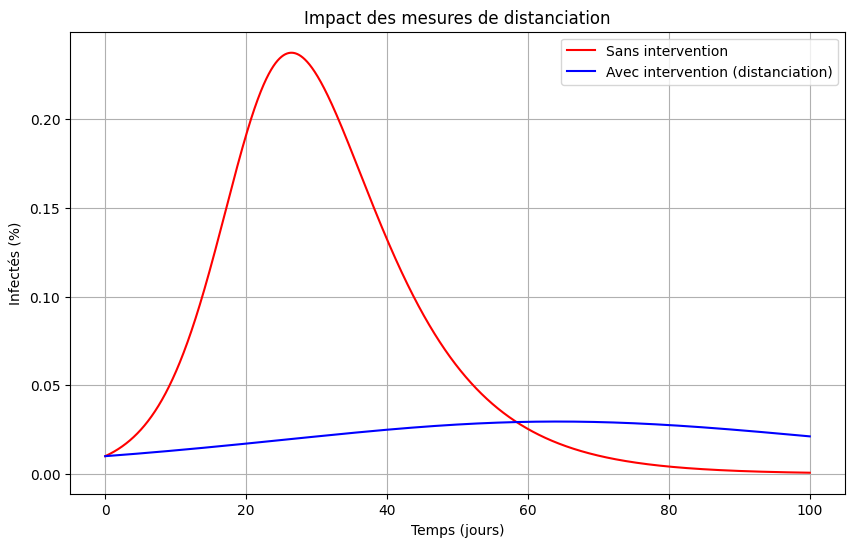

R0 apr√®s intervention : 1.25


In [8]:
# Fonction pour calculer R0
def calcul_r0(beta, gamma, mu):
    return beta / (gamma + mu)

# Calcul de R0 initial
R0_initial = calcul_r0(best_params[0], best_params[1], best_params[2])
print(f"R0 initial : {R0_initial:.2f}")

# R√©duction de beta de 50% pour l'intervention
beta_reduced = best_params[0] * 0.5

# Simulation avec intervention (r√©duction de beta)
temps_int, S_int, I_int, R_int, D_int = methode_euler_sird(beta_reduced, best_params[1], best_params[2], S0, I0, R0, D0, dt, t_max)

# Tracer les courbes avec et sans intervention
plt.figure(figsize=(10, 6))
plt.plot(temps_opt, I_opt, label="Sans intervention", color="red")
plt.plot(temps_int, I_int, label="Avec intervention (distanciation)", color="blue")
plt.xlabel("Temps (jours)")
plt.ylabel("Infect√©s (%)")
plt.title("Impact des mesures de distanciation")
plt.legend()
plt.grid()
plt.show()

# Calcul de R0 apr√®s intervention
R0_reduced = calcul_r0(beta_reduced, best_params[1], best_params[2])
print(f"R0 apr√®s intervention : {R0_reduced:.2f}")
